In [1]:
import os
from collections import defaultdict
import numpy as np
import matplotlib.pyplot as plt
from typing import Optional


def skip_labels(label: str) -> Optional[str]:
    if label not in ("other", "footer"):
        return label
    return None


In [2]:
from classifiers.tz_classifier.tz_features_extractor import TzTextFeatures
from classifiers.tz_classifier.tz_classifier_trainer import TzClassifierTrainer

In [3]:
resources_path = "/Users/anastasiabogatenkova/DOCXParser/classifiers/tz_classifier/resources"
path_out = os.path.join(resources_path, "tz_classifier.pkl.gz")
data_path = "/Users/anastasiabogatenkova/DOCXParser/data/labeled_tz.json"

feature_extractor = TzTextFeatures()
classifier_parameters = dict(learning_rate=0.2,
                             n_estimators=600,
                             booster="gbtree",
                             max_depth=5,
                             colsample_bynode=0.1,
                             colsample_bytree=1)

In [4]:
trainer = TzClassifierTrainer(
    data_path=data_path,
    feature_extractor=feature_extractor,
    path_out=path_out,
    path_log=resources_path,
    label_transformer=skip_labels,
    classifier_parameters=classifier_parameters,
    random_seed=42,
)

trainer.fit(cross_val_only=True)

100%|██████████| 10/10 [00:16<00:00,  1.62s/it]


save errors in /Users/anastasiabogatenkova/DOCXParser/classifiers/tz_classifier/resources/errors
true             -> predicted       	 cnt	 percent
item             -> part             00,037 (16.23%)
title            -> raw_text         00,031 (13.60%)
item             -> raw_text         00,030 (13.16%)
toc              -> raw_text         00,023 (10.09%)
part             -> toc              00,019 (8.33%)
item             -> toc              00,015 (6.58%)
toc              -> part             00,014 (6.14%)
raw_text         -> title            00,013 (5.70%)
raw_text         -> toc              00,009 (3.95%)
raw_text         -> item             00,008 (3.51%)
toc              -> item             00,007 (3.07%)
part             -> raw_text         00,006 (2.63%)
part             -> item             00,006 (2.63%)
raw_text         -> part             00,004 (1.75%)
toc              -> title            00,004 (1.75%)
item             -> title            00,001 (0.44%)
title           

In [5]:
y_test = trainer.y_val
y_pred = trainer.y_pred

y_test[:5], y_pred[:5]

(['title', 'title', 'toc', 'raw_text', 'raw_text'],
 ['title', 'title', 'title', 'title', 'title'])

In [6]:
classes_amount = defaultdict(int)
for item in y_test:
    classes_amount[item] += 1

print(classes_amount)

defaultdict(<class 'int'>, {'title': 23, 'toc': 67, 'raw_text': 69, 'item': 103, 'part': 30})


In [7]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred, labels=['title', 'toc', 'item', 'part', 'raw_text'])

array([[23,  0,  0,  0,  0],
       [ 1, 65,  0,  0,  1],
       [ 1,  5, 82, 13,  2],
       [ 0,  0,  1, 28,  1],
       [ 3,  1,  0,  0, 65]])

In [8]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import itertools

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
#     plt.title(title, fontsize=20)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, fontsize=20)
    plt.yticks(tick_marks, classes, fontsize=20)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 fontsize=20,
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('Правильная метка', fontsize=20)
    plt.xlabel('Предсказанная метка', fontsize=20)
    plt.savefig('confusion_matrix.png',  bbox_inches='tight')

[[23  0  0  0  0]
 [ 1 65  0  0  1]
 [ 1  5 82 13  2]
 [ 0  0  1 28  1]
 [ 3  1  0  0 65]]


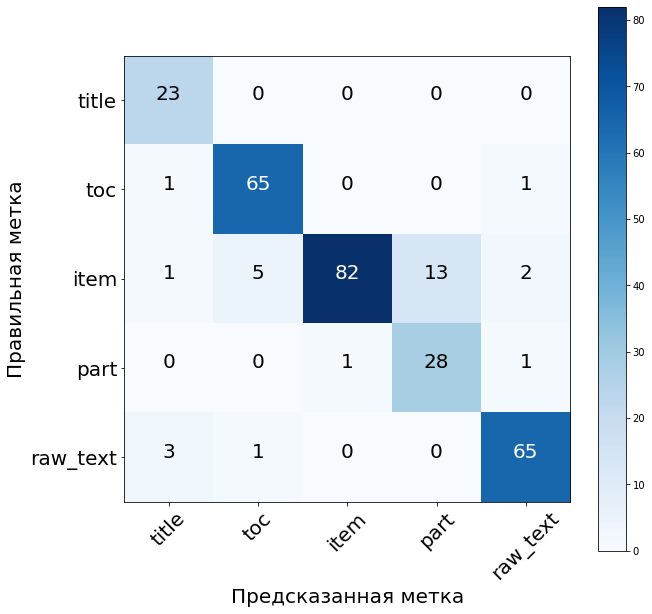

In [9]:
cnf_matrix = confusion_matrix(y_test, y_pred, labels=['title', 'toc', 'item', 'part', 'raw_text'])
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(10, 10))
plot_confusion_matrix(cnf_matrix, classes=['title', 'toc', 'item', 'part', 'raw_text'],
                      title='Confusion matrix, without normalization')